# Elastic time with transformations

Here we present a few examples of how to make durations elastic using transformations.

In [1]:
from copy import copy
from functools import wraps

import numpy as np
import matplotlib.pyplot as plt

from broadbean.segment import Segment, SegmentGroup
from broadbean.element import Element
from broadbean.sequence_simple import Sequence
from broadbean.plotting import plotter

Anything is possible, since everything has a name and a transformation just has to provide a dictionary specifying the durations of the **lowest-level** objects (i.e. the segments).

It is probably a good idea to have a transformation decorator. This one just does the bare minimum.

In [2]:
def transformation(trans_func):
    
    @wraps(trans_func)
    def inner(inp_dict):
        result = trans_func(inp_dict.copy())
        return result
    return inner

In [3]:
def sine(time, amp, freq, phase):
    return amp*np.sin(2*np.pi*time*freq + phase)

In [4]:
# segments
slow = Segment(function=sine, duration='slowtime', freq=1, amp=1, phase=0)
fast = Segment(function=sine, duration='fasttime', freq=10, amp=1, phase=0)
flat = Segment(function=sine, duration='flattime', freq=1, amp=0, phase=0)

sg = SegmentGroup(slow, flat, fast, duration='totaltime')

By using three different transformations with appropriate value dicts (contexts), we can make either segment elastic.

In [5]:
@transformation
def first_is_free(time_dict):
    tot = time_dict['totaltime']
    fast = time_dict['fasttime']
    flat = time_dict['flattime']
    time_dict['slowtime'] = tot - fast - flat
    return time_dict
    
    
@transformation
def second_is_free(time_dict):
    tot = time_dict['totaltime']
    fast = time_dict['fasttime']
    slow = time_dict['slowtime']
    time_dict['flattime'] = tot - fast - slow
    return time_dict    
    
    
@transformation
def third_is_free(time_dict):
    tot = time_dict['totaltime']
    slow = time_dict['slowtime']
    flat = time_dict['flattime']
    time_dict['fasttime'] = tot - slow - flat
    return time_dict

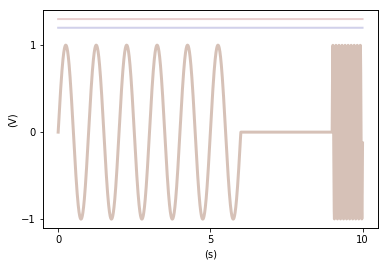

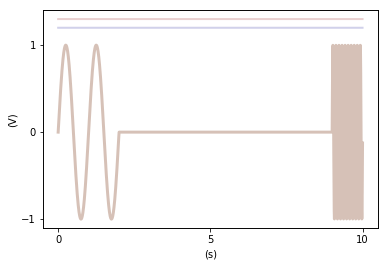

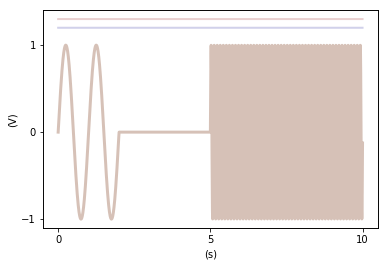

In [6]:
# we can use one dict for all three cases,
# since the elastic time is overwritten

times = {'slowtime': 2,
         'fasttime': 1,
         'flattime': 3,
         'totaltime': 10}

sg1 = SegmentGroup(slow, flat, fast, duration='totaltime',
                   transformation=first_is_free)
sg2 = SegmentGroup(slow, flat, fast, duration='totaltime',
                   transformation=second_is_free)
sg3 = SegmentGroup(slow, flat, fast, duration='totaltime',
                   transformation=third_is_free)

SR = 500

plotter(sg1, SR=SR, **times)
plotter(sg2, SR=SR, **times)
plotter(sg3, SR=SR, **times)

I (William) think that this is pretty kewl. The flip side is that it is *very* easy to make mistakes when defining the transformations and times. How to go about that?